In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Data

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/hackethon/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/hackethon/Test.csv')

# Observe the data

In [ ]:
print ("Train shape:",train.shape)
print ("Test shape:",test.shape)

Train shape: (13320, 9)
Test shape: (1480, 9)


In [ ]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
train.groupby("area_type")['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

**Drop unnessory column for better understanding of data.**

In [ ]:
df1=train.drop(['availability','society','area_type','balcony'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Deal with missing data

In [ ]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
df2=df1.dropna()
df2.isnull().sum()


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df2['BHK']=df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df2['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df2[df2.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


**Check the unique value in total_sqft**

In [ ]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

**now converting all values of total_sqft into a float value**

In [ ]:
df2['total_sqft'] = pd.to_numeric(df2['total_sqft'],errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
df2.loc[10]

location      Whitefield
size               3 BHK
total_sqft          1800
bath                   2
price                 70
BHK                    3
Name: 10, dtype: object

**Feature engineering for outlier detection dimension reduction**

In [ ]:
df3=df2.copy()
df3['price_per_sqft']=df3['price']*100000/df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
len(df3['location'].unique())

1304

In [ ]:
df3.location=df3.location.apply(lambda x: x.strip())
location_status=df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_status

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [ ]:
location_status_less_than_20=location_status[location_status<=20]
location_status_less_than_20

location
Poorna Pragna Layout    20
Yelachenahalli          20
Binny Pete              20
Sanjay nagar            20
HBR Layout              20
                        ..
LIC Colony               1
Kuvempu Layout           1
Kumbhena Agrahara        1
Kudlu Village,           1
1 Annasandrapalya        1
Name: location, Length: 1150, dtype: int64

In [ ]:
df3.location=df3.location.apply(lambda x: 'other' if x in location_status_less_than_20 else x)
len(df3.location.unique())

144

**outlier detection and removal**

In [ ]:
df3[df3.total_sqft/df3.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,other,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


# Working with Numeric Features

In [ ]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

bath       float64
balcony    float64
price      float64
dtype: object

In [ ]:
train.price.describe()

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

# Import matplotlib for plotting

In [ ]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (9, 5)

# Skew Correction

Skew is: 8.064468821273252


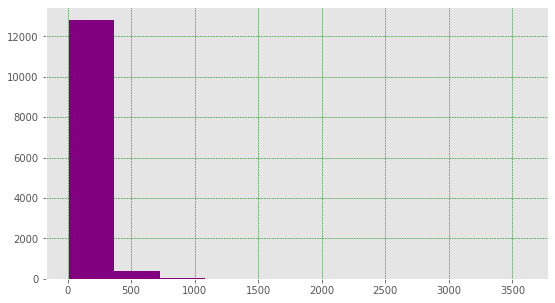

In [ ]:
print ("Skew is:", train.price.skew())
plt.hist(train.price, color='purple')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

Skew is: 0.8261876136371142


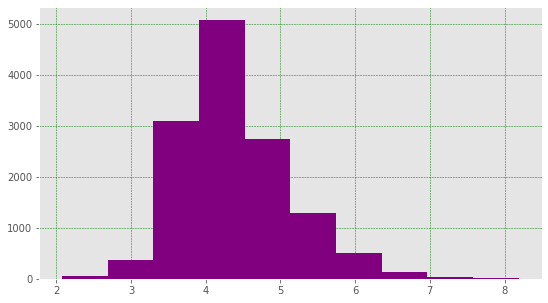

In [ ]:
target = np.log(train.price)
print ("Skew is:", target.skew())
plt.hist(target, color='purple')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

# **Univariate analysis**
**price (target variable)**
price of the house

In [ ]:
# For plotting bar graph of categorical variable for both train and test dataset on same figure with percentage. 
def plot_train_test_norm_bar(train_se, test_se, title, figsize=(12,7)):
    fig, ax = plt.subplots(ncols=2, figsize=figsize)
    fig.suptitle(title)
    tr_va_co = train_se.fillna('missing').value_counts(normalize=True)
    te_va_co = test_se.fillna('missing').value_counts(normalize=True)
    sns.barplot(y = tr_va_co.index, x= tr_va_co.values*100, ax=ax[0])
    ax[0].set(title='Train dataset', xlabel= 'percentage', ylabel=str(train_se.name))
    sns.barplot(y = te_va_co.index, x= te_va_co.values*100, ax=ax[1])
    ax[1].set(title='Test dataset', xlabel='percentage')
    plt.plot()

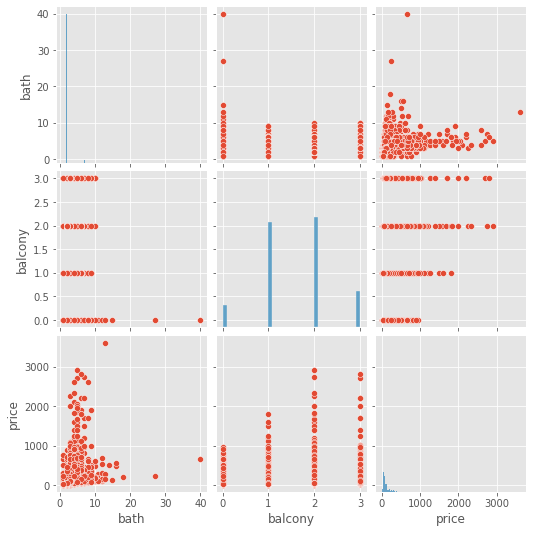

In [ ]:
sns.pairplot(train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


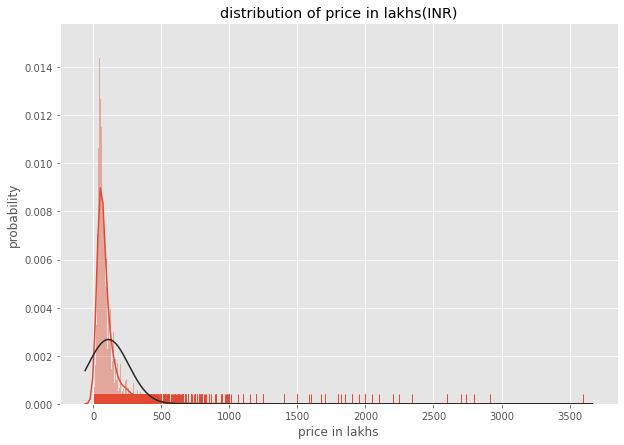

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(train['price'], kde=True, rug=True, ax=ax, bins=500, fit=stats.norm)
ax.set(title= 'distribution of price in lakhs(INR)', xlabel='price in lakhs', ylabel='probability')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


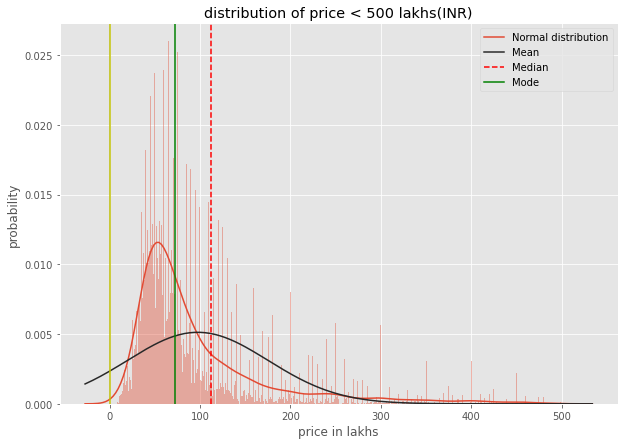

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(train[train['price'] < 500]['price'], kde=True, ax=ax, bins=500, fit=stats.norm)
ax.set(title= 'distribution of price < 500 lakhs(INR)', xlabel='price in lakhs', ylabel='probability')
ax.axvline(train['price'].mean(), color='r', linestyle='--')
ax.axvline(train['price'].median(), color='g', linestyle='-')
ax.axvline(train['price'].mode().all(), color='y', linestyle='-')
plt.legend({'Normal distribution': stats.norm, 'Mean':train['price'].mean(),'Median':train['price'].median(), 'Mode': train['price'].mode().all()})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


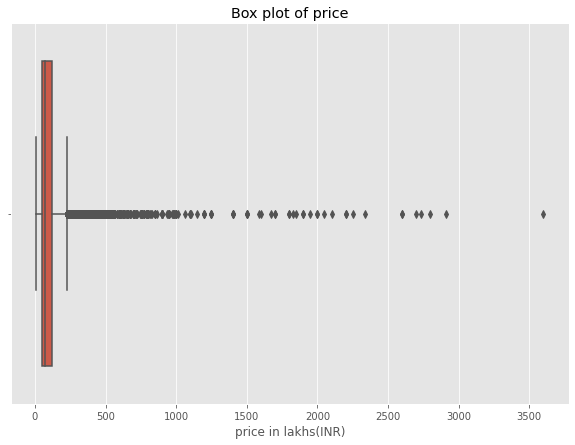

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(train['price'], ax=ax)
ax.set(xlabel= 'price in lakhs(INR)', title='Box plot of price')
plt.show()

**BALCONY**
*`number of balcony in the house`*








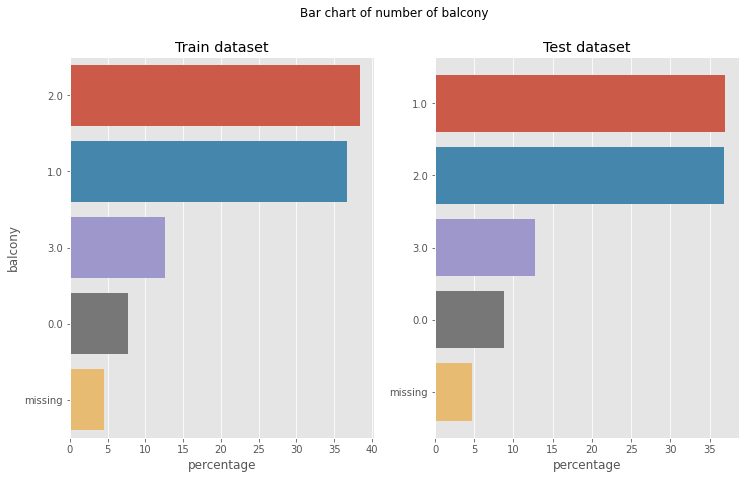

In [ ]:
plot_train_test_norm_bar(train['balcony'], test['balcony'], "Bar chart of number of balcony")


There are more houses which has 1 or 2 balcony, around 37% each.
Around 4% of the record has missing balcony value in both train and test dataset.


**Bath**
*`number of bathrooms in the house`*

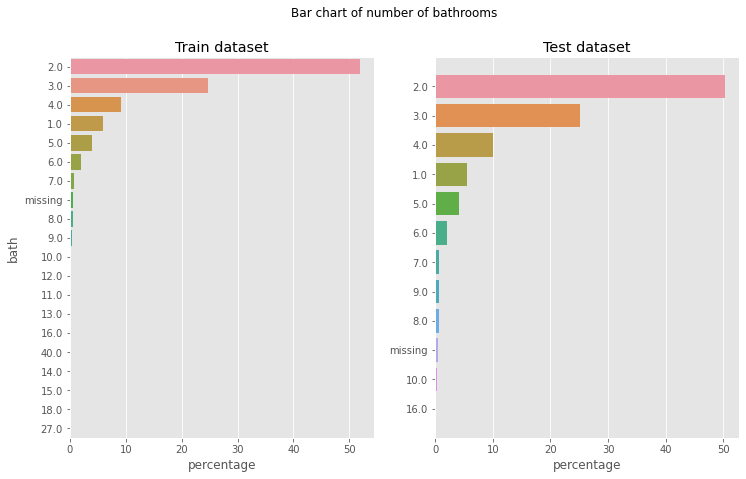

In [ ]:
plot_train_test_norm_bar(train['bath'], test['bath'], 'Bar chart of number of bathrooms')

50% of houses has 2 bathrooms.
There are also some house which has more than 10 bathrooms.
Test dataset doesn't contain some bath records which are present in Train dataset. e.g. 40, 40, 18, 27 etc.



**Area_type**
*`describes type of area`*

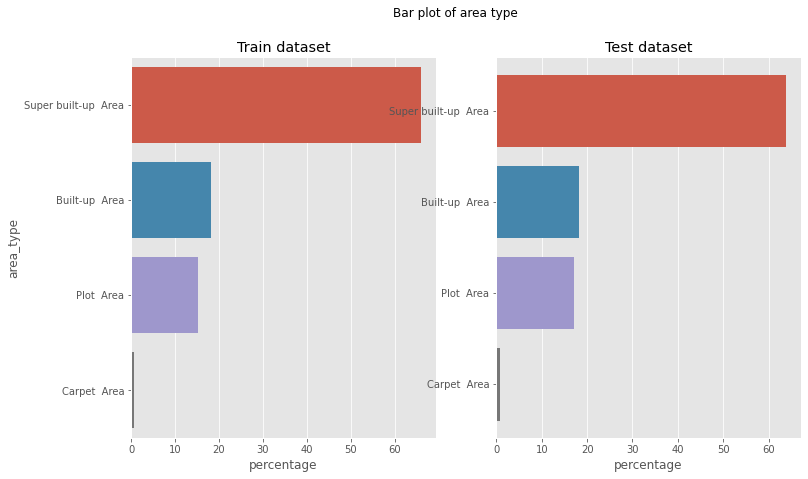

In [ ]:
plot_train_test_norm_bar(train['area_type'], test['area_type'], "Bar plot of area type")


Around 65% of house has super built up area type both in Train and Test dataset.

**Size**
*`size of house in BHK, RK and, bedrooms format`*

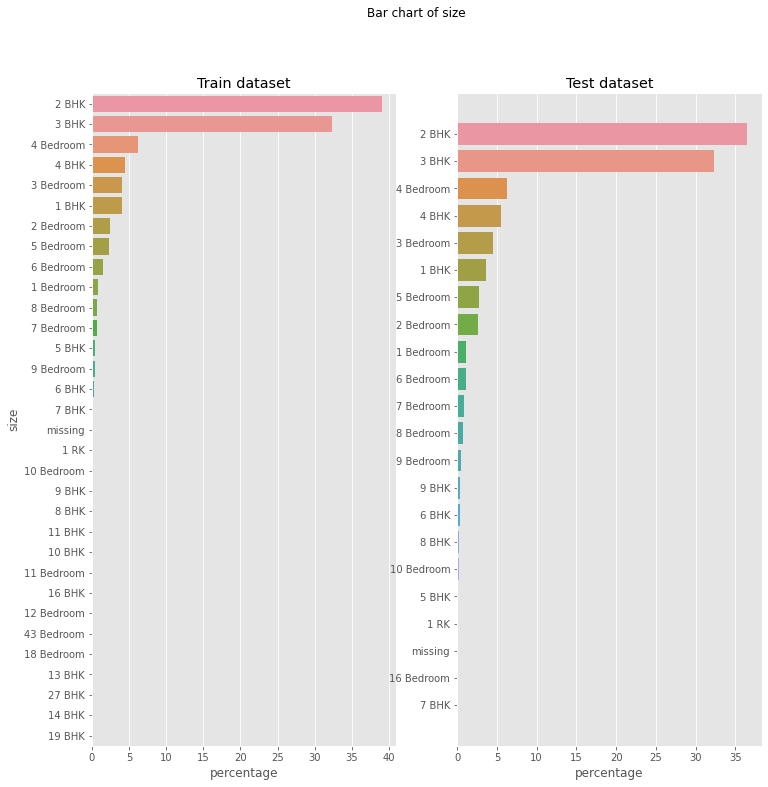

In [ ]:
plot_train_test_norm_bar(train['size'], test['size'], "Bar chart of size", (12, 12))

Most of the house are 2BHK or 3BHK, around 70% combined.
some of the size types are not present in train data which are present in test data.
some of the size types are not present in test data which are present in train data.


## Split Data into Train, Test

In [ ]:
data = train.select_dtypes(include=[np.number]).interpolate()
y = np.log(train.price)
X = data.drop(['price'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=0.33)

# Creating and Training the LinearRegression Model

In [ ]:
from sklearn.linear_model import LinearRegression 

lm = LinearRegression() 

lm.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predictions from our Linear Regression Model

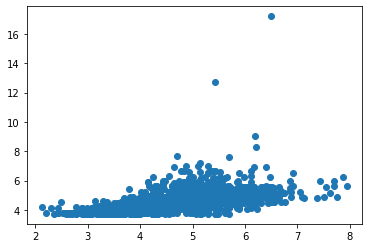

In [ ]:
predictions = lm.predict(X_test)  
plt.scatter(y_test,predictions)

# Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
**Mean Squared Error (MSE)** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand because it’s the average error.
MSE is more popular than MAE because MSE “punishes” larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE because RMSE is interpretable in the “y” units.
All of these are loss functions because we want to minimize them.



In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.40991779303015785
MSE: 0.3416163446245397
RMSE: 0.5844795502192868


# Conclusion
We have created a Linear Regression Model which we help the real state agent for estimating the house price.